# Обработка изображений

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузка изображения из архива plosPicHQ

In [40]:
u1='C:/Windows/WinPython-64bit-3.4.4.4Qt5/notebooks/plosPicHQ/20131121_121145.jpg'
I=imread(u1)
I.shape

(1920, 2560, 3)

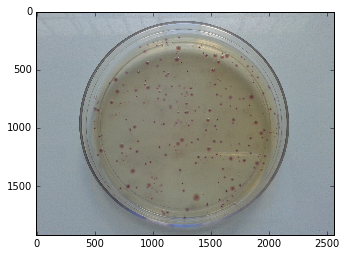

In [41]:
imshow(I)

Обрезаем изображение

In [48]:
F=I[800:1200, 600:1000]
F.shape

(400, 400, 3)

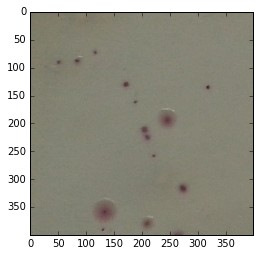

In [49]:
imshow(F);

Посмотрим, какой канал лучше (RGB)

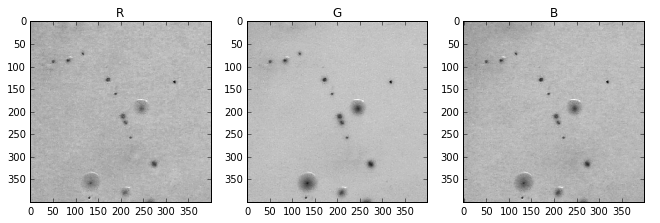

In [50]:
RGB='RGB'
figsize(11,4)
for i in range(F.shape[2]):
    subplot(1,F.shape[2], i+1)
    imshow(F[:,:,i], cmap='gray'); title(RGB[i])

Как и в шаблонном варианте, самый чистый и четкий - второй канал (зеленый). Значит, будем использовать его.

На всякий случай "почистим" изображение от шумов, используя специальную библиотеку для работы с изображениями

In [51]:
import scipy.ndimage as ndimage

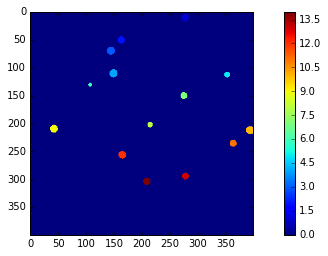

In [52]:
Zf = ndimage.gaussian_filter(Z, 4)

porog = Z.max()/2 
labeled, n = ndimage.label(Zf > porog)
imshow(labeled); colorbar();

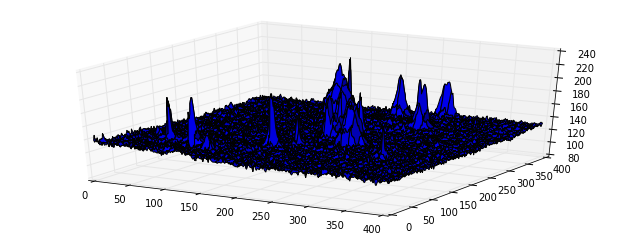

In [53]:
Z=1-F[:,:,1]

from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = fig.add_subplot(111, projection='3d')
X,Y = meshgrid(arange(400), arange(400))
ax.plot_surface(X,Y,Z);

Видно, что участки с колониями имеют более высокое значение, чем фон. Задаем пороговое значение и выделяем колонии контуром.

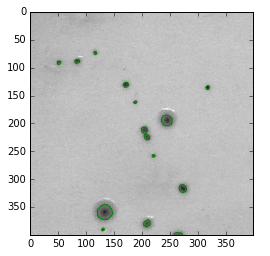

In [54]:
imshow(Z, cmap='gray_r');
coco=contour(Z, 1, colors='g') 

In [55]:
n=len(coco.allsegs[0])
n

16

Ответ:16 колоний в вырезаной области

Обработаем другое изображение

In [97]:
u2='C:/Windows/WinPython-64bit-3.4.4.4Qt5/notebooks/plosPicHQ/q120404-01.jpg'
I=imread(u1)
I.shape

(1536, 1538, 3)

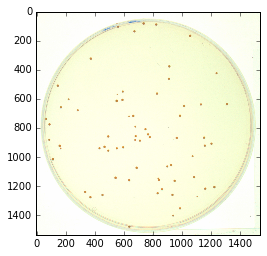

In [98]:
imshow(I)

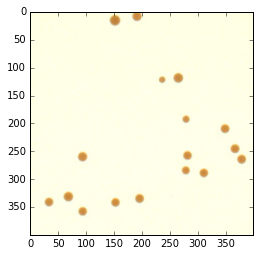

In [99]:
F2=I[600:1000, 400:800]
imshow(F2);

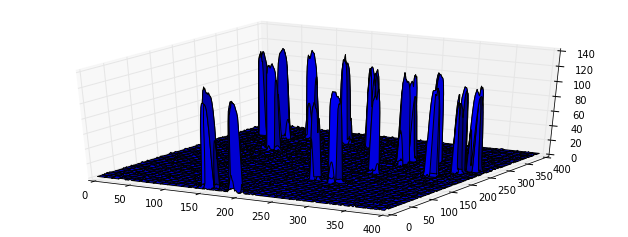

In [101]:
Z=1-F2[:,:,1]

from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = fig.add_subplot(111, projection='3d')
X,Y = meshgrid(arange(400), arange(400))
ax.plot_surface(X,Y,Z);

Выделим колонии контуром

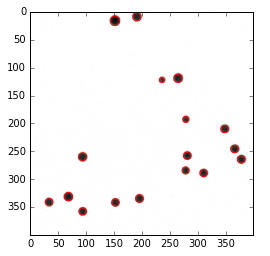

In [102]:
imshow(Z, cmap='gray_r');
coco=contour(Z, 1, colors='r') 

In [103]:
n=len(coco.allsegs[0])
n

17

В данном случае на вырезанном фрагменте 17 колоний.

Вывод: очень удобно для обработки изображений, которые не нужно обрезать и убирать область, не подлежащую обработки (например, как в нашем случае, область за чашкой-Петри). Было бы неплохо создать функцию автоматического распознования области анализа.